# TASK 1: Acquiring the Data
We start first with the FashionMNIST dataset

In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Set seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Initialize generator
generator = torch.Generator().manual_seed(seed)

# For Fashion MNIST
trainset_fashion = datasets.FashionMNIST('./data', download=True, train=True, transform=transforms.ToTensor())
trainloader_fashion = DataLoader(trainset_fashion, batch_size=64, shuffle=True, generator=generator)

testset_fashion = datasets.FashionMNIST('./data', download=True, train=False, transform=transforms.ToTensor())
testloader_fashion = DataLoader(testset_fashion, batch_size=64, shuffle=False)

# For CIFAR-10
transform_cifar = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset_cifar = datasets.CIFAR10('./data', download=True, train=True, transform=transform_cifar)
trainloader_cifar = DataLoader(trainset_cifar, batch_size=64, shuffle=True, generator=generator)

testset_cifar = datasets.CIFAR10('./data', download=True, train=False, transform=transform_cifar)
testloader_cifar = DataLoader(testset_cifar, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


We then verify the data is correct by using the code from: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
to plot the data

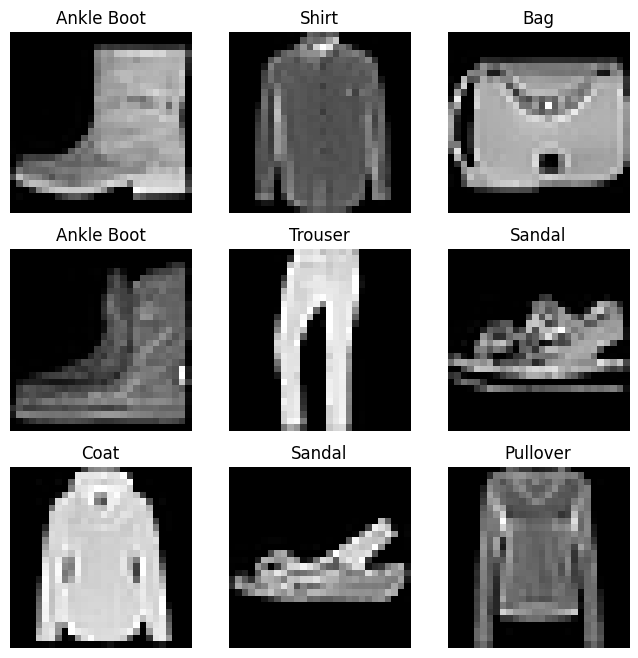

In [2]:

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset_fashion), size=(1,)).item()
    img, label = trainset_fashion[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

We then need to vectorize the images to be able to use them for learning.

In [3]:
trainset_fashion_X = trainset_fashion.data.numpy()
trainset_fashion_y = trainset_fashion.targets.numpy()
testset_fashion_X = testset_fashion.data.numpy()
testset_fashion_y = testset_fashion.targets.numpy()
len_img = trainset_fashion_X.shape[1] * trainset_fashion_X.shape[2]
trainset_fashion_X = trainset_fashion_X.reshape(trainset_fashion_X.shape[0], len_img)

In [26]:
from mlp_test import MLP 

mlp_class = MLP("ReLU", 1, 128, len_img, 10, "uniform")
# for weight in mlp_class.weights:
#     print(weight.shape)
#trainset_fashion_X = trainset_fashion_X
# mean = np.mean(trainset_fashion_X, axis=0)
# std = np.std(trainset_fashion_X, axis=0)
# trainset_fashion_X = (trainset_fashion_X - mean) / std
# res = mlp_class.forward(trainset_fashion_X)
# trainset_fashion_y[5]
# res[5]
# y_encoded = mlp_class.encode_y(trainset_fashion_y)
# mlp_class.compute_gradients(y_encoded)
mlp_class.fit(trainset_fashion_X, trainset_fashion_y, 0.1, batch_size=50, max_iters=2e3)


Finished in 1


In [27]:
test_res = mlp_class.forward(trainset_fashion_X)
test_res
# print(mlp_class.decode_y(test_res[:20]))
# print(trainset_fashion_y[:20])

array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])